# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [55]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import patsy

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [5]:
# Criando a matriz de design e a matriz y
y, X = patsy.dmatrices('tip ~ sex + smoker + day + net_bill', data=tips, return_type='dataframe')

In [6]:
# Exibindo as primeiras linhas da matriz de design e da matriz y
print("Matriz de Design:")
print(X.head())

print("\nMatriz y:")
print(y.head())

Matriz de Design:
   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  

Matriz y:
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61


In [7]:
# Ajustar o modelo
model = sm.OLS(y, X).fit()

In [8]:
# Imprimir um resumo do modelo para obter os p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           5.30e-19
Time:                        20:12:13   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [10]:
# Remover variáveis não significativas
X_reduced = X.drop(['Intercept'], axis=1)

In [12]:
# Ajustar o modelo reduzido
model_reduced = sm.OLS(y, X_reduced).fit()

In [13]:
# Imprimir um resumo do modelo reduzido
print(model_reduced.summary())

                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              274.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                   7.61e-104
Time:                        20:17:58   Log-Likelihood:                         -385.34
No. Observations:                 244   AIC:                                      782.7
Df Residuals:                     238   BIC:                                      803.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [14]:
# Calcular os resíduos
residuos = model.resid

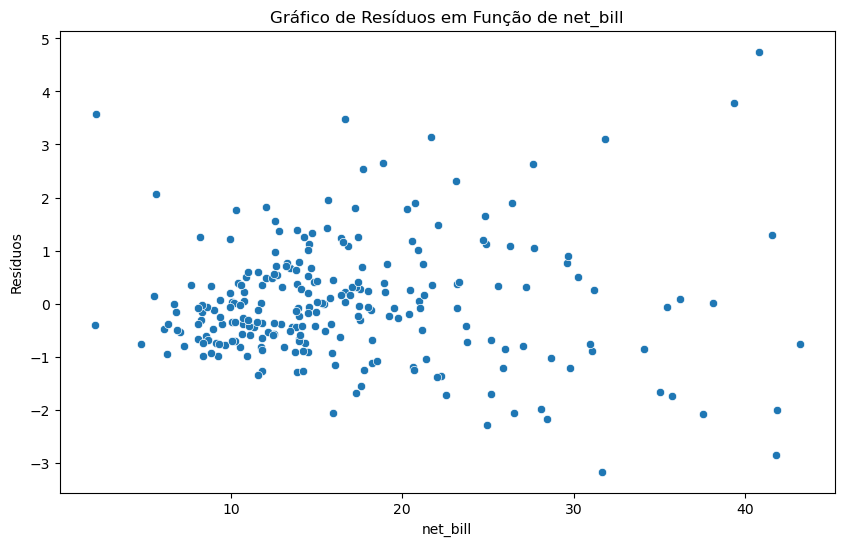

In [15]:
# Criar o gráfico de resíduos em função de net_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['net_bill'], y=residuos)
plt.title('Gráfico de Resíduos em Função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

In [23]:
# Adicionando colunas com transformações
tips['net_bill_log'] = np.log1p(tips['net_bill'])
tips['net_bill_poly'] = tips['net_bill']**2

In [24]:
# Ajustando modelos
model_net_bill = sm.OLS(tips['tip_pct'], sm.add_constant(tips['net_bill'])).fit()
model_net_bill_log = sm.OLS(tips['tip_pct'], sm.add_constant(tips['net_bill_log'])).fit()
model_net_bill_poly = sm.OLS(tips['tip_pct'], sm.add_constant(tips['net_bill_poly'])).fit()

In [25]:
# Comparando R-squared
print(f"R-squared for net_bill: {model_net_bill.rsquared}")
print(f"R-squared for net_bill_log: {model_net_bill_log.rsquared}")
print(f"R-squared for net_bill_poly: {model_net_bill_poly.rsquared}")

R-squared for net_bill: 0.09129084920662933
R-squared for net_bill_log: 0.18235932151723633
R-squared for net_bill_poly: 0.05276868170023119


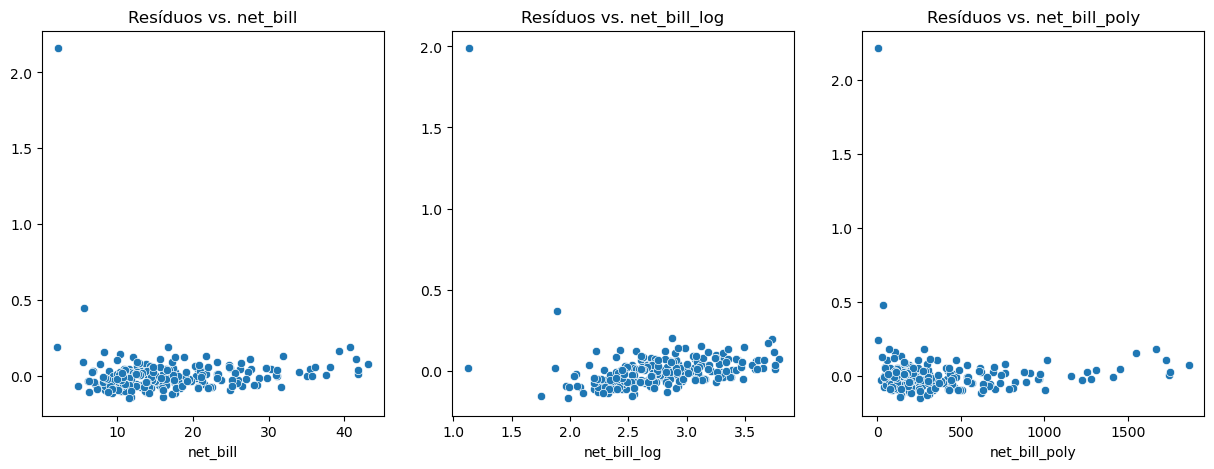

In [26]:
# Visualizando os resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para net_bill
sns.scatterplot(x=tips['net_bill'], y=model_net_bill.resid, ax=axes[0])
axes[0].set_title('Resíduos vs. net_bill')

# Gráfico para net_bill_log
sns.scatterplot(x=tips['net_bill_log'], y=model_net_bill_log.resid, ax=axes[1])
axes[1].set_title('Resíduos vs. net_bill_log')

# Gráfico para net_bill_poly
sns.scatterplot(x=tips['net_bill_poly'], y=model_net_bill_poly.resid, ax=axes[2])
axes[2].set_title('Resíduos vs. net_bill_poly')

plt.show()

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [27]:
# Criando a matriz de design usando o Patsy
formula = 'np.log(tip) ~ sex + smoker + day + net_bill'
y, X = patsy.dmatrices(formula, tips, return_type='dataframe')

# Exibindo as primeiras linhas da matriz de design
print(X.head())

# Exibindo as primeiras linhas da variável dependente (y)
print(y.head())

   Intercept  sex[T.Female]  smoker[T.No]  day[T.Fri]  day[T.Sat]  day[T.Sun]  \
0        1.0            1.0           1.0         0.0         0.0         1.0   
1        1.0            0.0           1.0         0.0         0.0         1.0   
2        1.0            0.0           1.0         0.0         0.0         1.0   
3        1.0            0.0           1.0         0.0         0.0         1.0   
4        1.0            1.0           1.0         0.0         0.0         1.0   

   net_bill  
0     15.98  
1      8.68  
2     17.51  
3     20.37  
4     20.98  
   np.log(tip)
0     0.009950
1     0.506818
2     1.252763
3     1.196948
4     1.283708


In [29]:
# Ajustar o modelo
model_gor = sm.OLS(y, X).fit()

# Imprimir um resumo do modelo para obter os p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     20.14
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           5.30e-19
Time:                        20:24:10   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             763.4
Df Residuals:                     237   BIC:                             787.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2017      0.258      4.652

In [30]:
# Remover variáveis não significativas
X_reduced_gor = X.drop(['Intercept'], axis=1)

In [31]:
# Ajustar o modelo reduzido
model_reduced_gor = sm.OLS(y, X_reduced_gor).fit()

In [32]:
# Imprimir um resumo do modelo reduzido
print(model_reduced.summary())

                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              274.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                   7.61e-104
Time:                        20:25:20   Log-Likelihood:                         -385.34
No. Observations:                 244   AIC:                                      782.7
Df Residuals:                     238   BIC:                                      803.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [33]:
# Calcular os resíduos
residuos = model_gor.resid

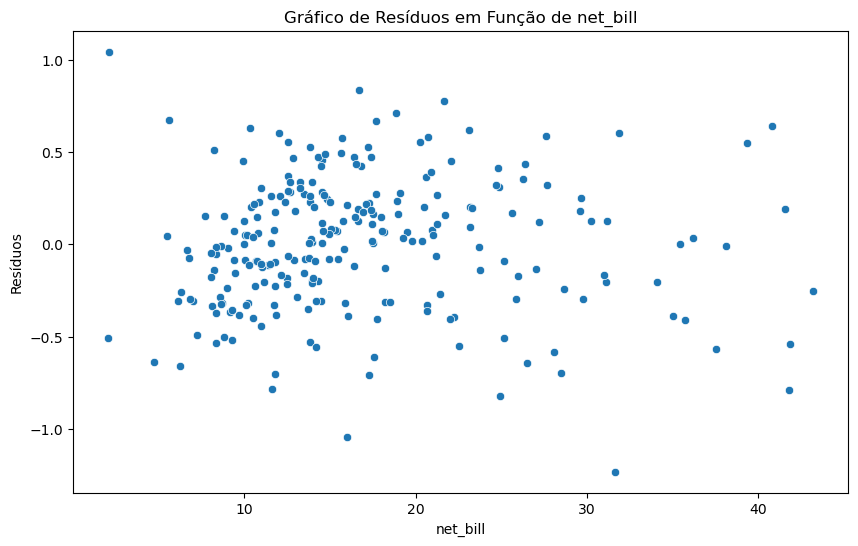

In [34]:
# Criar o gráfico de resíduos em função de net_bill
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['net_bill'], y=residuos)
plt.title('Gráfico de Resíduos em Função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.show()

In [35]:
# Adicione colunas transformadas ao DataFrame
X['log_net_bill'] = np.log(X['net_bill'])
X['net_bill_squared'] = X['net_bill'] ** 2

In [38]:
# Ajuste o modelo original
model_original = sm.OLS(y, sm.add_constant(X)).fit()
pred_original = model_original.predict(sm.add_constant(X))
mse_original = mean_squared_error(y, pred_original)

In [39]:
# Ajuste o modelo com log(net_bill)
model_log_net_bill = sm.OLS(y, sm.add_constant(X[['log_net_bill']])).fit()
pred_log_net_bill = model_log_net_bill.predict(sm.add_constant(X[['log_net_bill']]))
mse_log_net_bill = mean_squared_error(y, pred_log_net_bill)

In [40]:
# Ajuste o modelo com um polinômio de segundo grau
model_net_bill_squared = sm.OLS(y, sm.add_constant(X[['net_bill_squared']])).fit()
pred_net_bill_squared = model_net_bill_squared.predict(sm.add_constant(X[['net_bill_squared']]))
mse_net_bill_squared = mean_squared_error(y, pred_net_bill_squared)

In [41]:
# Compare as métricas de desempenho
print(f'MSE Original: {mse_original}')
print(f'MSE Log(net_bill): {mse_log_net_bill}')
print(f'MSE Polinômio de 2º grau: {mse_net_bill_squared}')

MSE Original: 0.12333000361217962
MSE Log(net_bill): 0.1289838192733166
MSE Polinômio de 2º grau: 0.14208900117171536


In [42]:
# Escolha o modelo com o menor MSE
best_model = model_original if mse_original < min(mse_log_net_bill, mse_net_bill_squared) else \
             model_log_net_bill if mse_log_net_bill < mse_net_bill_squared else model_net_bill_squared

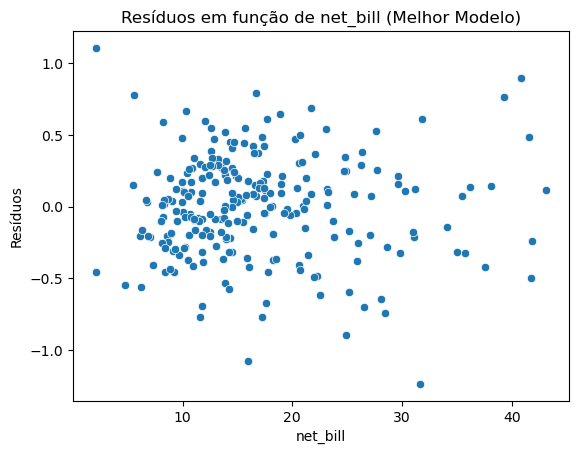

In [43]:
# Visualize o gráfico de resíduos em função de net_bill para o melhor modelo
residuals_best_model = best_model.resid
sns.scatterplot(x=X['net_bill'], y=residuals_best_model)
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Resíduos em função de net_bill (Melhor Modelo)')
plt.show()

In [44]:
# Retorne o modelo para a escala original
pred_tip_original_scale = np.exp(best_model.predict(sm.add_constant(X)))  

In [47]:
# Calcular R^2 na escala original de tip
r2_original_scale = r2_score(y, pred_tip_original_scale)

In [48]:
print(f'R^2 na escala original de tip: {r2_original_scale}')

R^2 na escala original de tip: -18.380335407157496


O primeiro tem o melhor modelo de determinacao

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [60]:
# Carregar a base de dados
df = pd.read_csv('previsao_de_renda.csv')

# Exibir as primeiras linhas do DataFrame
print(df.head())

   Unnamed: 0    data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01       15056    F             False             True   
1           1  2015-01-01        9968    M              True             True   
2           2  2015-01-01        4312    F              True             True   
3           3  2015-01-01       10639    F             False             True   
4           4  2015-01-01        7064    M              True            False   

   qtd_filhos        tipo_renda           educacao estado_civil  \
0           0        Empresário         Secundário     Solteiro   
1           0       Assalariado  Superior completo       Casado   
2           0        Empresário  Superior completo       Casado   
3           1  Servidor público  Superior completo       Casado   
4           0       Assalariado         Secundário     Solteiro   

  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia    renda  
0            Casa     26       6.602

In [61]:
# Remover linhas com valores ausentes
df = df.dropna()

In [62]:
# Selecionar as variáveis
X = df[['tempo_emprego']]
y = df['renda']

In [63]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Inicializar o modelo de regressão linear
modelo_regressao = LinearRegression()

In [65]:
# Treinar o modelo
modelo_regressao.fit(X_train, y_train)

LinearRegression()

In [66]:
# Fazer previsões no conjunto de teste
y_pred = modelo_regressao.predict(X_test)

In [67]:
# Calcular o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

In [68]:
# Exibir os resultados
print(f'Coeficiente: {modelo_regressao.coef_[0]}')
print(f'Interceptação: {modelo_regressao.intercept_}')
print(f'Erro Quadrático Médio (MSE): {mse}')

Coeficiente: 524.4946323216531
Interceptação: 2106.159875289554
Erro Quadrático Médio (MSE): 49032239.60655531


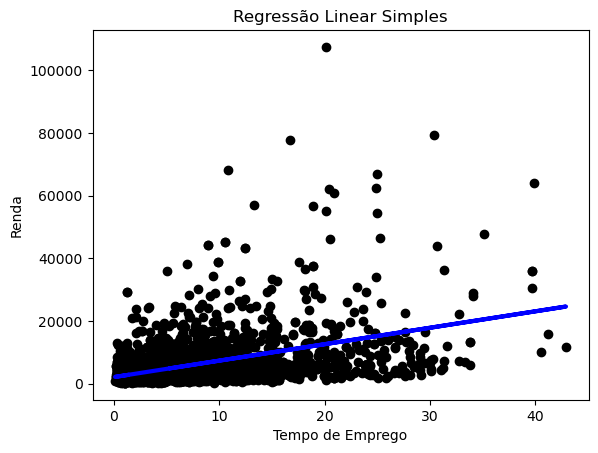

In [69]:
# Visualizar o ajuste do modelo
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')
plt.title('Regressão Linear Simples')
plt.show()

In [70]:
# Adicionar constante à matriz de design
X_with_intercept = sm.add_constant(X)

In [71]:
# Ajustar o modelo usando statsmodels para obter estatísticas adicionais
modelo_statsmodels = sm.OLS(y, X_with_intercept).fit()

In [72]:
# Resíduos
residuos = modelo_statsmodels.resid

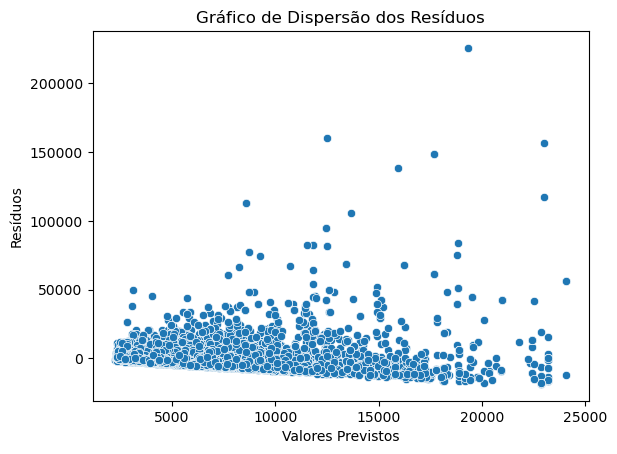

In [73]:
# Gráfico de dispersão dos resíduos
sns.scatterplot(x=modelo_statsmodels.predict(), y=residuos)
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Dispersão dos Resíduos')
plt.show()

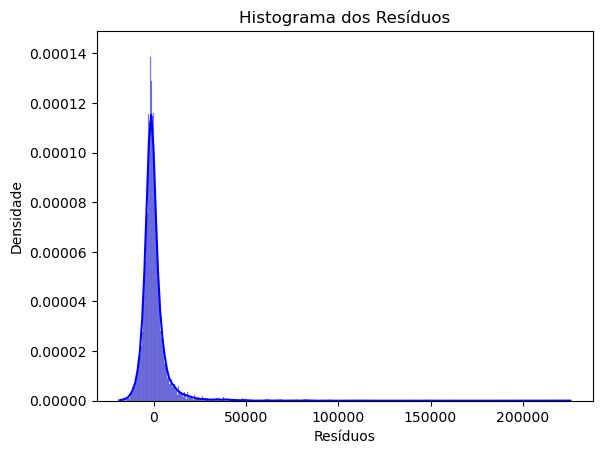

In [74]:
# Histograma dos resíduos
sns.histplot(residuos, kde=True, stat='density', color='blue')
plt.xlabel('Resíduos')
plt.ylabel('Densidade')
plt.title('Histograma dos Resíduos')
plt.show()

In [81]:
# Defina a fórmula de Patsy
formula = 'renda ~ tempo_emprego + idade + educacao + qtd_filhos'

In [82]:
# Crie a matriz de design e a variável resposta usando Patsy
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [83]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Ajuste o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Faça previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [87]:
# Avalie o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)


print(f'MSE (Treinamento): {mse_train}')
print(f'MSE (Teste): {mse_test}')

MSE (Treinamento): 71811777.1761432
MSE (Teste): 48823647.98534671


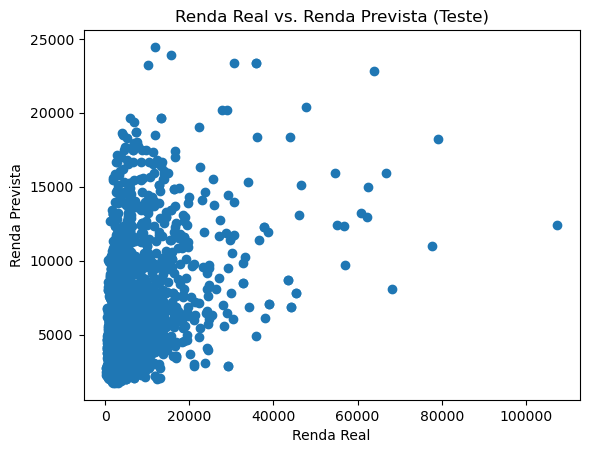

In [88]:
# Visualize os resultados
plt.scatter(y_test, y_pred_test)
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista')
plt.title('Renda Real vs. Renda Prevista (Teste)')
plt.show()

In [112]:
reg = smf.ols('renda ~ tempo_emprego + idade', data = df).fit()

In [113]:
df['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:16:41   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12424   BIC:                         2.593e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2049.8890    327.704      6.255      0.000    1407.538    2692.240
tempo_emprego   508.4632     11.583     43.896      0.000     485.758     531.168
idade             3.4413      8.277      0.416      0.678     -12.783      19.665
==============================================================================
Omnibus:                    17027.326   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7675172.334
Skew:                           7.716   Prob(JB):                         0.00
Kurtosis:                     123.767   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Adicione uma constante ao modelo
X = sm.add_constant(X)

In [97]:
# Ajuste o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

In [98]:
# Exiba o resumo estatístico do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     312.3
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:12:19   Log-Likelihood:            -1.2962e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12419   BIC:                         2.593e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [99]:
# Remova variáveis não significativas (usando um limiar de 0.05 para o p-value)
significant_vars = model.pvalues[model.pvalues < 0.05].index
formula_updated = f'renda ~ {"+".join(significant_vars[1:])}'

In [100]:
# Crie a matriz de design e a variável resposta atualizadas usando Patsy
y_updated, X_updated = patsy.dmatrices(formula_updated, data=df, return_type='dataframe')

In [101]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

In [102]:
# Ajuste o modelo de regressão linear múltipla com variáveis significativas
model_updated = LinearRegression()
model_updated.fit(X_train, y_train)

LinearRegression()

In [103]:
# Faça previsões
y_pred_train = model_updated.predict(X_train)
y_pred_test = model_updated.predict(X_test)

In [104]:
# Avalie o desempenho do modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'MSE (Treinamento): {mse_train}')
print(f'MSE (Teste): {mse_test}')

MSE (Treinamento): 84315078.08809252
MSE (Teste): 57890492.81839743


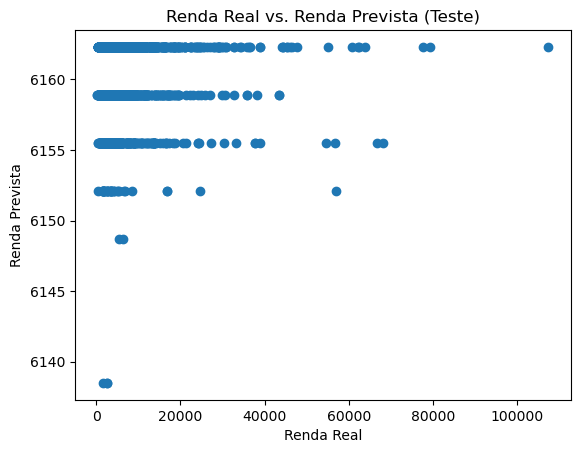

In [105]:
# Visualize os resultados
plt.scatter(y_test, y_pred_test)
plt.xlabel('Renda Real')
plt.ylabel('Renda Prevista')
plt.title('Renda Real vs. Renda Prevista (Teste)')
plt.show()

In [106]:
residuos = reg.resid

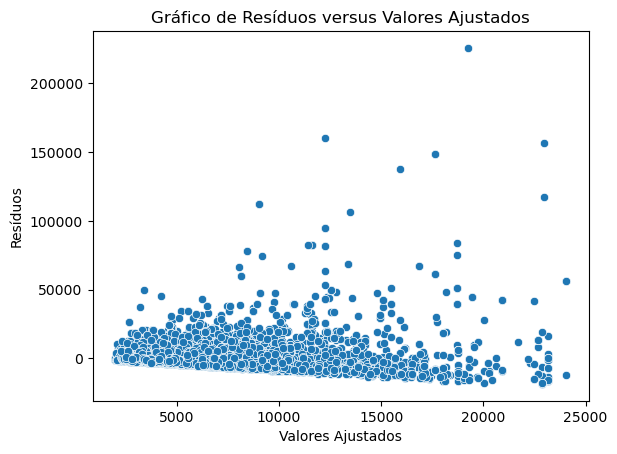

In [107]:
# Gráfico de dispersão dos resíduos versus valores ajustados
sns.scatterplot(x=reg.fittedvalues, y=residuos)
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos versus Valores Ajustados')
plt.show()

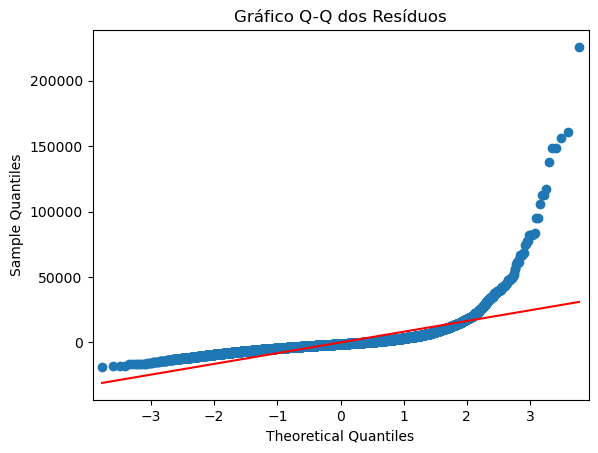

In [108]:
# Gráfico Q-Q dos resíduos
sm.qqplot(residuos, line='s')
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()

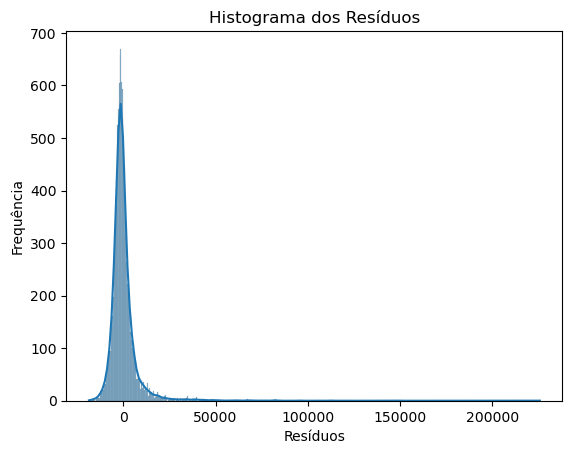

In [109]:
# Histograma dos resíduos
sns.histplot(residuos, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

Os dois ficaram muito iguais, acredito que nao usei suficientes variaveis neste caso.